# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 



# **Link to the GithUb:**
https://github.com/mirna1983/Mirna-s-branch/tree/main

In [1]:
import os
import re

import emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# !pip install emoji
# !pip install nltk
import nltk

# change `data_location` to the location of the folder on your machine.
data_location = "/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results"
# Download stopwords if not already available
nltk.download('stopwords', download_dir='/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1')
nltk.data.path.append('/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1')
sw = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirnaphilip/Desktop/Applied Text
[nltk_data]     Minning/m2/M1...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens != 0 else 0
    num_characters = sum(len(word) for word in tokens) 
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Using assertion statements in code helps verify that functions work correctly by automatically checking specific conditions, aiding in catching errors early during development. This ensures the reliability and correctness of the code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
# Define the data location
data_location = "/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results/lyrics"

# Initialize an empty DataFrame
lyrics_data = pd.DataFrame(columns=['artist', 'song', 'lyrics'])

# Read the lyrics data into the DataFrame
for artist_folder in os.listdir(data_location):
    artist_path = os.path.join(data_location, artist_folder)
    if os.path.isdir(artist_path):
        for song_file in os.listdir(artist_path):
            song_path = os.path.join(artist_path, song_file)
            if os.path.isfile(song_path):  # Ensure it's a file
                with open(song_path, 'r') as file:
                    lyrics = file.read()
                    song_title = os.path.splitext(song_file)[0]
                    new_row = pd.DataFrame({'artist': [artist_folder], 'song': [song_title], 'lyrics': [lyrics]})
                    lyrics_data = pd.concat([lyrics_data, new_row], ignore_index=True)

# Display the DataFrame
# lyrics_data.head()

In [7]:
data_location = "/Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results/twitter"
twitter_dfs = []

for file in os.listdir(data_location):
    if file == ".DS_Store":
        continue
    if file.endswith("_data.txt"):
        file_path = os.path.join(data_location, file)
        print(f"Reading file: {file_path}")
        with open(file_path, 'r') as file_obj:
            content = file_obj.read()
            lines = content.splitlines()
            if lines:
                column_names = lines[0].split('\t')
                data = [line.split('\t') for line in lines[1:]]
                twitter_df = pd.DataFrame(data, columns=column_names)
                twitter_dfs.append(twitter_df)

# print(f"Number of Twitter data files read: {len(twitter_dfs)}")

Reading file: /Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results/twitter/cher_followers_data.txt
Reading file: /Users/mirnaphilip/Desktop/Applied Text Minning/m2/M1 Results/twitter/robynkonichiwa_followers_data.txt


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [8]:
# Data Cleaning for Twitter Data
punctuation_set = set(punctuation)  # speeds up comparison

def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation_set])
    # Split on whitespace
    tokens = text.split()
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    tokens = [word for word in tokens if word not in sw]
    return tokens

# Assuming 'description' column has the text data for cleaning
twitter_df['cleaned_text'] = twitter_df['description'].apply(clean_text)

# Display cleaned Twitter DataFrame
print(twitter_df.head(1))            

   screen_name     name                   id                  location  \
0  AngelxoArts  Angelxo  1424055675030806529  Zacatlan, Puebla, Mexico   

  followers_count friends_count  \
0              29           535   

                                         description  \
0  "I love chill" •Facebook / Instagram / SoundCl...   

                                        cleaned_text  
0  [love, chill, •facebook, instagram, soundcloud...  


In [9]:
# create your clean lyrics data here
def clean_lyrics(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation_set])
    # Split on whitespace
    tokens = text.split()
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    # Remove stopwords
    tokens = [word for word in tokens if word not in sw]
    return tokens

# Apply the cleaning function to the lyrics column
lyrics_data['cleaned_lyrics'] = lyrics_data['lyrics'].apply(clean_lyrics)

# Display cleaned Lyrics DataFrame
lyrics_data.head(1)

,artist,song,lyrics,cleaned_lyrics
0,robyn,robyn_includemeout,"""Include Me Out""\n\n\n\nIt is really very simp...","[include, really, simple, single, pulse, repea..."


## Basic Descriptive Statistics

In [10]:
# calls to descriptive_stats here
# Calculate descriptive stats for the top 5 cleaned lyrics entries
for text in lyrics_data['cleaned_lyrics'].head(5):
    try:
        tokens = text
        stats_verbose_true = descriptive_stats(tokens, verbose=True)
        stats_verbose_false = descriptive_stats(tokens, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens) if len(tokens) != 0 else 0
        expected_num_characters = sum(len(token) for token in tokens)

        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

There are 234 tokens in the data.
There are 89 unique tokens in the data.
There are 1186 characters in the data.
The lexical diversity is 0.380 in the data.
There are 153 tokens in the data.
There are 63 unique tokens in the data.
There are 818 characters in the data.
The lexical diversity is 0.412 in the data.
There are 174 tokens in the data.
There are 33 unique tokens in the data.
There are 713 characters in the data.
The lexical diversity is 0.190 in the data.
There are 246 tokens in the data.
There are 42 unique tokens in the data.
There are 1162 characters in the data.
The lexical diversity is 0.171 in the data.
There are 129 tokens in the data.
There are 53 unique tokens in the data.
There are 624 characters in the data.
The lexical diversity is 0.411 in the data.


In [11]:
# Calculate descriptive stats for the top 5 cleaned Twitter entries
for text in twitter_df['cleaned_text'].head(5):
    try:
        tokens = text
        stats_verbose_true = descriptive_stats(tokens, verbose=True)
        stats_verbose_false = descriptive_stats(tokens, verbose=False)
        expected_num_tokens = len(tokens)
        expected_num_unique_tokens = len(set(tokens))
        expected_lexical_diversity = len(set(tokens)) / len(tokens) if len(tokens) != 0 else 0
        expected_num_characters = sum(len(token) for token in tokens)

        assert(stats_verbose_true[0] == expected_num_tokens)
        assert(stats_verbose_false[1] == expected_num_unique_tokens)
        assert(abs(stats_verbose_false[2] - expected_lexical_diversity) < 0.02)
        assert(stats_verbose_false[3] == expected_num_characters)
    except AssertionError:
        print(f"Assertion failed for text: {text}")
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")

There are 7 tokens in the data.
There are 7 unique tokens in the data.
There are 68 characters in the data.
The lexical diversity is 1.000 in the data.
There are 16 tokens in the data.
There are 16 unique tokens in the data.
There are 87 characters in the data.
The lexical diversity is 1.000 in the data.
There are 24 tokens in the data.
There are 22 unique tokens in the data.
There are 99 characters in the data.
The lexical diversity is 0.917 in the data.
There are 18 tokens in the data.
There are 17 unique tokens in the data.
There are 99 characters in the data.
The lexical diversity is 0.944 in the data.
There are 12 tokens in the data.
There are 12 unique tokens in the data.
There are 95 characters in the data.
The lexical diversity is 1.000 in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data, the "top 5 words" would likely be common stopwords such as "the," "and," "a," "to," and "in." These words are frequently used in the English language and would dominate the list of most common words, overshadowing more meaningful and distinctive words that better represent the content of the lyrics or tweets. Removing stopwords helps to highlight the words that carry more significant meaning and provide better insights into the themes and topics discussed by the artists.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I initially believed that different artists would exhibit varying levels of lexical diversity based on their styles and genres. For instance, I expected a more lyrically complex artist to have higher lexical diversity than a pop artist. The actual analysis might confirm this expectation if there is a significant difference, or it might show that both artists use a similar range of vocabulary. This insight helps to understand their unique linguistic styles and audience engagement.



## Specialty Statistics




In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁



In [13]:
# Initialize dictionaries to hold emoji counts
emoji_counts = {}
artist_emoji_counts = {}

# Iterate through each row in the DataFrame
for index, row in twitter_df.iterrows():
    description = row['description']
    artist_name = row['screen_name']
    
    # Find all emojis in the description
    for char in description:
        if emoji.is_emoji(char):
            # Update the overall emoji count
            if char in emoji_counts:
                emoji_counts[char] += 1
            else:
                emoji_counts[char] = 1
            
            # Update the emoji count for the specific artist
            if artist_name in artist_emoji_counts:
                if char in artist_emoji_counts[artist_name]:
                    artist_emoji_counts[artist_name][char] += 1
                else:
                    artist_emoji_counts[artist_name][char] = 1
            else:
                artist_emoji_counts[artist_name] = {char: 1}

# Get the top 10 emojis for each artist
for artist, emoji_count in artist_emoji_counts.items():
    top_10_emojis_artist = sorted(emoji_count.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f'Top 10 emojis for {artist}:')
    for emoji_char, count in top_10_emojis_artist:
        print(f'{emoji_char}: {count}')


Top 10 emojis for songsfornikola:
♥: 1
Top 10 emojis for thibaud_lola:
🌱: 1
🤡: 1
🌸: 1
🌈: 1
Top 10 emojis for MusiFlo:
🎵: 1
Top 10 emojis for imteddymykaels:
🌈: 1
Top 10 emojis for thequeerstriver:
🏳: 1
🌈: 1
Top 10 emojis for BexThreads:
🔥: 4
🚀: 2
🐕: 2
🐢: 2
👀: 1
Top 10 emojis for mcarracedo10:
😊: 1
✌: 1
🌈: 1
Top 10 emojis for MultiverseJC:
🎧: 1
🙏: 1
Top 10 emojis for AStickerman:
▶: 1
Top 10 emojis for MarScho4711:
🖕: 2
Top 10 emojis for joaquinxcx:
💛: 2
Top 10 emojis for Sweethotpink2:
💘: 1
💌: 1
💝: 1
💖: 1
💗: 1
💓: 1
💕: 1
💟: 1
💔: 1
🐷: 1
Top 10 emojis for H4RRY85:
⚫: 1
⚪: 1
🏇: 1
⚽: 1
🏈: 1
🏉: 1
🎶: 1
🎲: 1
♟: 1
♠: 1
Top 10 emojis for luis_rj82:
📍: 2
Top 10 emojis for reedanubis:
🎥: 2
❤: 1
Top 10 emojis for Piggelinett:
💕: 1
Top 10 emojis for douglascoulter:
🏳: 1
🌈: 1
Top 10 emojis for FitzsimonsJeff:
💜: 1
Top 10 emojis for SophieASlut:
🌏: 2
Top 10 emojis for lyshtola:
🌿: 1
💜: 1
Top 10 emojis for Amazon_Makeu:
💚: 1
🛍: 1
Top 10 emojis for SupernovaJax:
🏳: 2
🟡: 1
⚪: 1
🟣: 1
⚫: 1
🌈: 1
⚧: 1
🏴: 1
T

### Hashtags



In [14]:
# Initialize dictionaries to hold hashtag counts
hashtag_counts = {}
artist_hashtag_counts = {}

# Iterate through each row in the DataFrame
for index, row in twitter_df.iterrows():
    description = row['description']
    artist_name = row['screen_name']
    
    # Find all hashtags in the description using regular expression
    hashtags = re.findall(r'#\w+', description)
    
    # Loop through each hashtag
    for hashtag in hashtags:
        # Update the overall hashtag count
        if hashtag in hashtag_counts:
            hashtag_counts[hashtag] += 1
        else:
            hashtag_counts[hashtag] = 1
        
        # Update the hashtag count for the specific artist
        if artist_name in artist_hashtag_counts:
            if hashtag in artist_hashtag_counts[artist_name]:
                artist_hashtag_counts[artist_name][hashtag] += 1
            else:
                artist_hashtag_counts[artist_name][hashtag] = 1
        else:
            artist_hashtag_counts[artist_name] = {hashtag: 1}

# Sort the hashtag counts in descending order and get the top 10 overall
top_10_hashtags = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 hashtags overall:")
for hashtag, count in top_10_hashtags:
    print(f'{hashtag}: {count}')

# Sort and print the top 10 hashtags for each artist
for artist, hashtag_count in artist_hashtag_counts.items():
    top_10_hashtags_artist = sorted(hashtag_count.items(), key=lambda x: x[1], reverse=True)[:10]
    print(f'Top 10 hashtags for {artist}:')
    for hashtag, count in top_10_hashtags_artist:
        print(f'{hashtag}: {count}')


Top 10 hashtags overall:
#BlackLivesMatter: 337
#BLM: 306
#blacklivesmatter: 208
#1: 199
#music: 174
#Music: 113
#EDM: 86
#LGBTQ: 75
#TeamFollowBack: 59
#blm: 56
Top 10 hashtags for thibaud_lola:
#morecomingsoon: 1
Top 10 hashtags for MultiverseJC:
#WorldOfWarcraft: 1
#HipHop: 1
#Underground: 1
#Mainstream: 1
#Money: 1
#Women: 1
#Weed: 1
Top 10 hashtags for Kitsikakomim:
#MohammadTheCat: 1
#VanGoghTheCat: 1
#KendraTheHumanBeing: 1
Top 10 hashtags for beingawomenis:
#BeingAWomanIs: 1
Top 10 hashtags for _TheRealDM:
#Antifa: 1
#ASRoma: 1
#StraightOuttaMonteverde: 1
#Mozarmy: 1
#AutismAwareness: 1
Top 10 hashtags for reedanubis:
#Reedanubis: 1
Top 10 hashtags for SupernovaJax:
#cPTSD: 1
#DisabledRights: 1
#GWithTheT: 1
Top 10 hashtags for iammapfumo:
#Jazz: 1
#Sagittarius: 1
#Arsenal: 1
Top 10 hashtags for rayljohns:
#Linguistics: 1
#NLProc: 1
#AI: 1
#MachineLearning: 1
Top 10 hashtags for squaressares:
#BeKind: 1
Top 10 hashtags for iainoco:
#BrokenRecord: 1
Top 10 hashtags for Arel_Cee:

### Song Titles



In [15]:
# Initialize a dictionary to store word counts by artist
artist_song_title_words = {}

# Iterate through each row in the lyrics DataFrame
for index, row in lyrics_data.iterrows():
    artist_name = row['artist']
    song_title = row['song']
    
    # Extract words from song title, removing any non-alphanumeric characters
    words = re.findall(r'\b\w+\b', song_title)
    
    # Update the word count for the specific artist
    if artist_name in artist_song_title_words:
        artist_song_title_words[artist_name].update(words)
    else:
        artist_song_title_words[artist_name] = Counter(words)

# Print the five most common words in song titles for each artist
for artist, word_counts in artist_song_title_words.items():
    top_5_words = word_counts.most_common(5)
    print(f"Top 5 words in song titles for {artist}:")
    for word, count in top_5_words:
        print(f'{word}: {count}')

Top 5 words in song titles for robyn:
robyn_includemeout: 1
robyn_electric: 1
robyn_beach2k20: 1
robyn_lovekills: 1
robyn_timemachine: 1
Top 5 words in song titles for cher:
cher_comeandstaywithme: 1
cher_pirate: 1
cher_stars: 1
cher_thesedays: 1
cher_lovesohigh: 1


### Song Lengths



artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

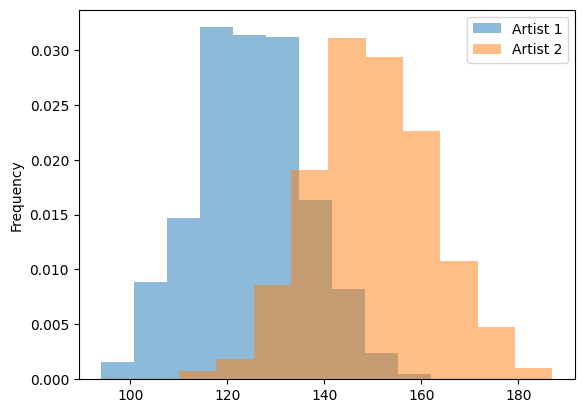

In [16]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The regular expression `'\s+'` matches one or more whitespace characters. This includes spaces, tabs, newlines, and other whitespace characters. The `'\s'` stands for any whitespace character, and the + quantifier means "one or more." Therefore, `'\s+'` will match sequences of whitespace characters of any length.


In [17]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [18]:
# Tokenize the lyrics and calculate song lengths
lyrics_data['tokenized_lyrics'] = lyrics_data['lyrics'].apply(tokenize_lyrics)
lyrics_data['song_length'] = lyrics_data['tokenized_lyrics'].apply(len)
# Create a DataFrame with artist names and song lengths
song_lengths_df = lyrics_data[['artist', 'song_length']]


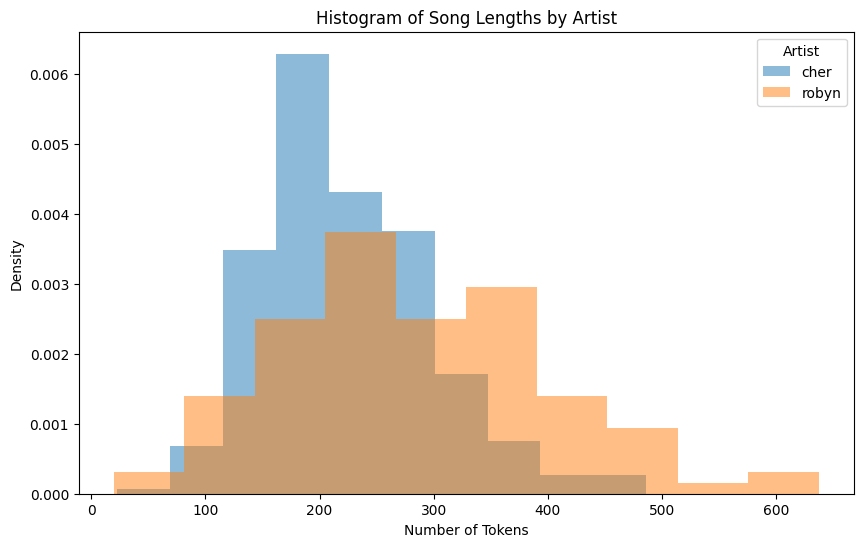

In [19]:
# Plot the histograms
plt.figure(figsize=(10, 6))
for artist, group in song_lengths_df.groupby('artist'):
    group['song_length'].plot(kind='hist', density=True, alpha=0.5, label=artist)

plt.title('Histogram of Song Lengths by Artist')
plt.xlabel('Number of Tokens')
plt.ylabel('Density')
plt.legend(title='Artist')
plt.show()
